<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/SamplingStatsAndDistros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline
- Introduction (Purpose + scope)
- Body
  - sample summary statistics and examples (coefficients of fitted model)
  - load data and showcase
  - Sampling distribution of summary statistics. (use sample mean as example)
  - Expected value of summary statistics
  - Variance of summary statistic
  - Variance within a sample vs variance of a given stat over samplings
  - Standrad Error of stats and confidence interval. (SE(beta0))
  - F-test (within groups variance vs between group variance)
- Conclusion:

## Git setup and data load

In [1]:
import google.colab
repo_path = 'AminehTechnicalWritings'
!git -C $repo_path pull origin || git clone https://github.com/aminehd/AminehTechnicalWritings/ $repo_path
local_clone = '/content/' + repo_path
!git config --global user.email "amineh.dadsetan@gmail.com"
!git config --global user.name "Amineh Dadsetan"

fatal: cannot change to 'AminehTechnicalWritings': No such file or directory
Cloning into 'AminehTechnicalWritings'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 174 (delta 96), reused 140 (delta 79), pack-reused 3
Receiving objects: 100% (174/174), 3.18 MiB | 10.34 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [2]:
import numpy as np
files = np.load(local_clone + '/population.npz')
# sample = np.load(local_clone + '/sample.npy'
population = files['arr_0']
population.shape

(300000, 2)

### Summary Statistic

Previously we explained the concept of population and the concept of sample. Basically we have one population (e.g., population of American people) but we can sample a subset in many ways (e.g., sample of America people under age 18, sample of American people living in new your, etc).

In fact if N is population size, there is $2^N$ samples.

Now a statistic or measure can be defined on the whole population as well as any given sample. A statistic or a measure in mathematic is a generalization of concepts such as lenght or heigh for a given set. Since samples and the population are sets, we can define such things on them. A well known one is mean. Thus you can think of population mean or any given sample mean.

So far it was fairly easy to explain things. But it gets a bit trickier when we wanna talk about the distribution of such measures over allll samples and compare them with the value of measure on the poulation.

The motivation behind sampling is that population is too big and it is virtually impossible to calculate the mean for the whole population. Let's say as a minister of something you need the average age of your population.  It sounds quite impossible to get everybody's ages and calculate their mean.

Let's look at the population mean and sample mean for the data set we have created in previous notebooks.

But before that lets do some randome samplings of samples of size 100 that share the same predictors (`x_samples`)




In [7]:
print(population[:, 0])
len(population[:,0])
distinct_xs = np.unique(population[:, 0])
print(len(distinct_xs))
sample_size = 100
x_samp_index = np.linspace(0, len(distinct_xs)-1, sample_size).astype(int)
x_samples = distinct_xs[x_samp_index]
x_samples
n_repeat = len(population[:,0]) // len(distinct_xs)
n_repeat

[ 1.  1.  1. ... 10. 10. 10.]
30


10000

We sampled 100 distinct x and stored them in `x_samples`. There are several observations for each x in sample and thus several responses in the population. Thus we can have several sampling with given `x_samples`. Let's pick one such and plot it:
Next thing is you wanna randomly pick y's that are response to these x's. Not easiest to implement now. think of abstraction HERE!!!

In [8]:
rand_gen = np.random.default_rng(2)
def sample_response(x_sams, population, rand_gen):
  for x in x_sams:
    # generate integer between 0 to n_repeat
    index = rand_gen.integers(0, n_repeat)
    yield (population[x * n_repeat + index, 0], population[x * n_repeat + index, 1],)

y_for_x_samples = np.array(list(sample_response(x_samp_index, population, rand_gen))
)


# YAY HERE!! plot the sample distro and mark it's mean with red

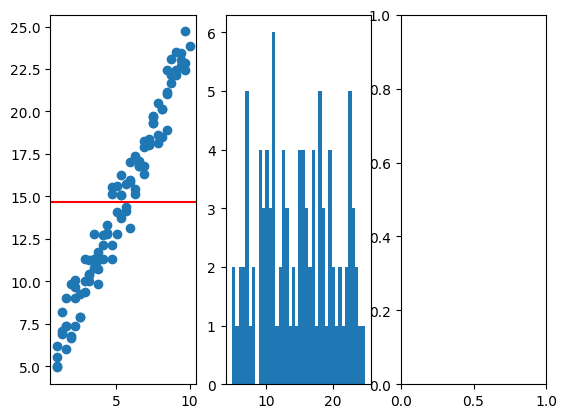

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3)
ax[0].scatter(y_for_x_samples[:,0], y_for_x_samples[:,1] )
# ax[1] = ax[0].twinx()
# ax[1].axhlhine(y=np.mean(y_for_x_samples[:,1]), color='r')
ax[1].hist(y_for_x_samples[:,1], bins=40)
mean = np.mean(y_for_x_samples[:,1])
ax[0].axhline(y=mean, color='r')

Let's repeat this kinda sampling for many times to collect some means.

(array([  1.,   0.,   0.,   0.,   3.,   7.,   8.,  11.,  34.,  47.,  84.,
        114., 158., 238., 297., 368., 452., 552., 620., 675., 702., 811.,
        739., 757., 737., 587., 495., 438., 334., 227., 174., 129.,  69.,
         56.,  30.,  20.,  12.,   7.,   3.,   4.]),
 array([14.27105974, 14.29062919, 14.31019865, 14.32976811, 14.34933757,
        14.36890702, 14.38847648, 14.40804594, 14.4276154 , 14.44718485,
        14.46675431, 14.48632377, 14.50589323, 14.52546268, 14.54503214,
        14.5646016 , 14.58417106, 14.60374051, 14.62330997, 14.64287943,
        14.66244889, 14.68201834, 14.7015878 , 14.72115726, 14.74072672,
        14.76029617, 14.77986563, 14.79943509, 14.81900455, 14.838574  ,
        14.85814346, 14.87771292, 14.89728238, 14.91685183, 14.93642129,
        14.95599075, 14.97556021, 14.99512966, 15.01469912, 15.03426858,
        15.05383804]),
 <BarContainer object of 40 artists>)

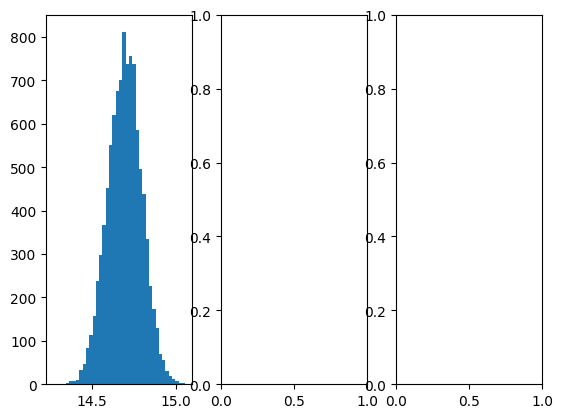

In [17]:
means = []
for i in range(10000):
  y_for_x_samples = np.array(list(sample_response(x_samp_index, population, rand_gen)))
  means.append(np.mean(y_for_x_samples[:,1]))

fig, ax = plt.subplots(ncols=3)
ax[0].hist(means, bins=40)
# HERE!!! convert means to nparray find summary description for it whith libs, also save more info with the poulation data set, maybe pulpulation size, num distinct




https://en.wikipedia.org/wiki/Sampling_distribution
start with mu but get to beta_i HERE!!!

The concept of unbiased estimator pops up one more time. HERE!!!


Then we look at expected value of sample statistices over multiple sampling. Also we look at variance of stuff within sample, and variance of sample stat over several samplings. This indeed is an intersting case when sample stat is defined to be the mean of sample. HERE!!!




notebook we try to look at the model coefficients ( 𝛽𝑖 's ) as summary statistics defined on samples. You can also think of them as measures since samples are subsets.



These can help understand concept of Standard Error and F-test better.